In [20]:
# import libraries and discover data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
df=pd.read_csv('/kaggle/input/produce-prices-dataset/ProductPriceIndex.csv')
df.head()

,productname,date,farmprice,atlantaretail,chicagoretail,losangelesretail,newyorkretail,averagespread
0,Strawberries,2019-05-19,$1.16,$2.23,$1.70,$1.99,$2.54,82.33%
1,Romaine Lettuce,2019-05-19,$0.35,$1.72,$2.00,$1.69,$1.99,428.57%
2,Red Leaf Lettuce,2019-05-19,$0.32,$1.84,$1.84,$1.69,$1.89,467.19%
3,Potatoes,2019-05-19,$1.50,$5.32,$5.14,$3.99,$6.22,244.50%
4,Oranges,2019-05-19,$0.41,$1.42,$1.45,$1.34,$2.05,281.71%


In [21]:
dollar_cols = ['farmprice','atlantaretail','chicagoretail','losangelesretail','newyorkretail']
for col in dollar_cols:
    # Remove $ and commas, strip spaces
    df[col] = df[col].astype(str).str.replace('$','', regex=False).str.replace(',','', regex=False).str.strip()
    # Convert to float, invalid parsing becomes NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.head()

,productname,date,farmprice,atlantaretail,chicagoretail,losangelesretail,newyorkretail,averagespread
0,Strawberries,2019-05-19,1.16,2.23,1.70,1.99,2.54,82.33%
1,Romaine Lettuce,2019-05-19,0.35,1.72,2.00,1.69,1.99,428.57%
2,Red Leaf Lettuce,2019-05-19,0.32,1.84,1.84,1.69,1.89,467.19%
3,Potatoes,2019-05-19,1.50,5.32,5.14,3.99,6.22,244.50%
4,Oranges,2019-05-19,0.41,1.42,1.45,1.34,2.05,281.71%


In [22]:
#checking nulls
df.isnull().sum()

productname         0
date                0
farmprice           1
atlantaretail       1
chicagoretail       0
losangelesretail    0
newyorkretail       8
averagespread       0
dtype: int64

In [23]:
#  Replace empty strings or spaces with NaN
df['averagespread'] = df['averagespread'].replace(r'^\s*$', np.nan, regex=True)

#  Remove % and convert to numeric safely
df['averagespread'] = pd.to_numeric(
    df['averagespread'].astype(str).str.replace('%', '', regex=False).str.strip(),
    errors='coerce'  # invalid parsing becomes NaN
)

#  Convert percentage to decimal (optional)
df['averagespread'] = df['averagespread'] / 100
df['averagespread'].fillna(df['averagespread'].median(), inplace=True)
df.isnull().sum()

/tmp/ipykernel_202/1657174399.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['averagespread'].fillna(df['averagespread'].median(), inplace=True)


productname         0
date                0
farmprice           1
atlantaretail       1
chicagoretail       0
losangelesretail    0
newyorkretail       8
averagespread       0
dtype: int64

In [24]:

df['date'] = pd.to_datetime(df['date'], errors='coerce')  # invalid dates become NaT
# Extract year, month, day
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
#Drop original date column if not needed
df = df.drop('date', axis=1)
df.head()

,productname,farmprice,atlantaretail,chicagoretail,losangelesretail,newyorkretail,averagespread,year,month,day
0,Strawberries,1.16,2.23,1.70,1.99,2.54,0.8233,2019,5,19
1,Romaine Lettuce,0.35,1.72,2.00,1.69,1.99,4.2857,2019,5,19
2,Red Leaf Lettuce,0.32,1.84,1.84,1.69,1.89,4.6719,2019,5,19
3,Potatoes,1.50,5.32,5.14,3.99,6.22,2.4450,2019,5,19
4,Oranges,0.41,1.42,1.45,1.34,2.05,2.8171,2019,5,19


In [25]:
# Spread = city price minus farm price
df['spread_atlanta'] = df['atlantaretail'] - df['farmprice']
df['spread_chicago'] = df['chicagoretail'] - df['farmprice']
df['spread_losangeles'] = df['losangelesretail'] - df['farmprice']
df['spread_newyork'] = df['newyorkretail'] - df['farmprice']

df=df.dropna()

In [26]:
# encode catagorical feature 
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
df['productname']=le.fit_transform(df['productname'])
df.head()

,productname,farmprice,atlantaretail,chicagoretail,losangelesretail,newyorkretail,averagespread,year,month,day,spread_atlanta,spread_chicago,spread_losangeles,spread_newyork
0,19,1.16,2.23,1.70,1.99,2.54,0.8233,2019,5,19,1.07,0.54,0.83,1.38
1,18,0.35,1.72,2.00,1.69,1.99,4.2857,2019,5,19,1.37,1.65,1.34,1.64
2,17,0.32,1.84,1.84,1.69,1.89,4.6719,2019,5,19,1.52,1.52,1.37,1.57
3,16,1.50,5.32,5.14,3.99,6.22,2.4450,2019,5,19,3.82,3.64,2.49,4.72
4,13,0.41,1.42,1.45,1.34,2.05,2.8171,2019,5,19,1.01,1.04,0.93,1.64


In [27]:
from sklearn.model_selection import train_test_split
X = df.drop(['averagespread'],axis=1)
y = df['averagespread']

# 2️Split into train and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
#  Check shapes
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (12604, 13)
X_test: (3152, 13)
y_train: (12604,)
y_test: (3152,)


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

#  Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 0.1113
Mean Squared Error (MSE): 0.0690
R² Score: 0.9769


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Train set predictions ---
y_train_pred = model.predict(X_train)

mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("=== Train Set ===")
print(f"MAE: {mae_train:.4f}")
print(f"MSE: {mse_train:.4f}")
print(f"R²: {r2_train:.4f}")

# --- Test set predictions ---
y_test_pred = model.predict(X_test)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\n=== Test Set ===")
print(f"MAE: {mae_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"R²: {r2_test:.4f}")


=== Train Set ===
MAE: 0.0443
MSE: 0.0151
R²: 0.9950

=== Test Set ===
MAE: 0.1113
MSE: 0.0690
R²: 0.9769


In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Use 5-fold CV
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

print("Cross-Validation R² Scores:", cv_scores)
print("Mean CV R²:", np.mean(cv_scores))


Cross-Validation R² Scores: [0.970649   0.96143567 0.96263509 0.96700419 0.96922696]
Mean CV R²: 0.9661901844927818


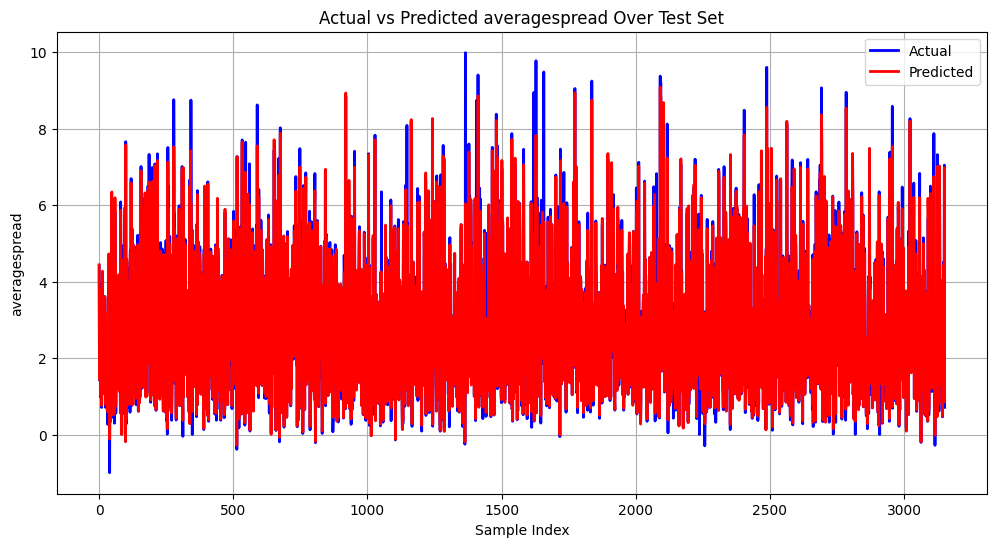

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

# Actual values line
plt.plot(y_test.values, label='Actual', color='blue', linewidth=2)
# Predicted values line
plt.plot(y_pred, label='Predicted', color='red', linewidth=2)
plt.xlabel("Sample Index")
plt.ylabel("averagespread")
plt.title("Actual vs Predicted averagespread Over Test Set")
plt.legend()
plt.grid(True)
plt.show()
# the predicted values are so close to real values

In [33]:
import pickle
# Save the trained Random Forest model
with open("rf_model.pkl", "wb") as f:
    pickle.dump(model, f)


In [34]:
import gradio as gr
import pickle
import numpy as np

# Load the model
with open("rf_model.pkl", "rb") as f:
    model = pickle.load(f)

# Product name encoding (example mapping from your data)
product_mapping = {
    "Strawberries": 19,
    "Romaine Lettuce": 18,
    "Red Leaf Lettuce": 17,
    "Potatoes": 16,
    "Oranges": 13
}

def predict_averagespread(productname, farmprice, atlantaretail, chicagoretail,
                          losangelesretail, newyorkretail, year, month, day):
    productnum = product_mapping.get(productname, 0)  # 0 as default if unknown

    # Compute spreads (same as in training)
    spread_atlanta = atlantaretail - farmprice
    spread_chicago = chicagoretail - farmprice
    spread_losangeles = losangelesretail - farmprice
    spread_newyork = newyorkretail - farmprice

    # Prepare input (13 features)
    X_input = np.array([[productnum, farmprice, atlantaretail, chicagoretail,
                         losangelesretail, newyorkretail, year, month, day,
                         spread_atlanta, spread_chicago, spread_losangeles, spread_newyork]])

    pred = model.predict(X_input)
    return float(pred[0])

# Gradio interface
inputs = [
    gr.Dropdown(list(product_mapping.keys()), label="Product Name"),
    gr.Number(label="Farm Price"),
    gr.Number(label="Atlanta Retail"),
    gr.Number(label="Chicago Retail"),
    gr.Number(label="Los Angeles Retail"),
    gr.Number(label="New York Retail"),
    gr.Number(label="Year"),
    gr.Number(label="Month"),
    gr.Number(label="Day")
]

output = gr.Number(label="Predicted Average Spread")

demo = gr.Interface(fn=predict_averagespread, inputs=inputs, outputs=output,
                    title="Average Spread Prediction",
                    description="Enter farm & retail prices, date, and product to predict average spread.")

demo.launch()


* Running on local URL:  http://127.0.0.1:7861
It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://94e821eb2bb70df358.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [36]:
import csv

def log_input_output(input_data, prediction):
    with open("prediction_log.csv", "a", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(list(input_data) + [prediction])
